# Model 5

## Data preprocessing

In [1]:
# Setup
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

2023-08-24 11:47:44.296298: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# Loading the MATLAB files.
xs = loadmat('xs_all.mat')
tau = loadmat('tau_all.mat')

In [3]:
def pre_processing(xs, tau, n_samples=1000, xs_name='xs_all', tau_name='tau_all'):

    tau_all = tau['tau_all'].squeeze()
    xs_all = xs['xs_all'].squeeze()

    # Normalized
    tau_all = np.array([normalize(i.T, axis=0) for i in tau_all])
    xs_all = np.array([normalize(i.T, axis=0) for i in xs_all])

    # tau_all = np.array([i.T for i in tau_all])
    # xs_all = np.array([i.T for i in xs_all])

    return xs_all, tau_all

In [4]:
xs_all, tau_all = pre_processing(xs,tau)

## Creating the Model

In [5]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(xs_all,
                                                    tau_all,
                                                    test_size=0.2,
                                                    shuffle=True)

X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

2023-08-24 11:48:02.450438: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-24 11:48:02.451303: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-08-24 11:48:02.466368: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-24 11:48:02.466628: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2023-08-24 11:48:02.466687: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-08-24 11:48:02.496621: I tensorflow/stream_executor/platform/de

In [6]:
def create_model(X_train, y_train, n_epochs=10):

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(20001,12)),
        tf.keras.layers.Dense(128, activation='linear'),
        tf.keras.layers.Dense(4, activation='linear')
    ])

    model.compile(loss=tf.keras.losses.mean_absolute_error,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mse'])

    history = model.fit(X_train,
                        y_train,
                        epochs=n_epochs,
                        use_multiprocessing=True)

    return model, history

In [7]:
model, history = create_model(X_train, y_train, n_epochs=8)

2023-08-24 11:48:05.207103: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-08-24 11:48:05.212763: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2689000000 Hz


Epoch 1/8


2023-08-24 11:48:05.481304: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 61443072 exceeds 10% of free system memory.
2023-08-24 11:48:05.481306: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 61443072 exceeds 10% of free system memory.
2023-08-24 11:48:05.531469: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


25/25 [==============================] - 3s 102ms/step - loss: 0.0043 - mse: 5.2635e-05
Epoch 2/8
25/25 [==============================] - 3s 102ms/step - loss: 0.0011 - mse: 1.8090e-05
Epoch 3/8
25/25 [==============================] - 3s 100ms/step - loss: 9.4604e-04 - mse: 1.4949e-05
Epoch 4/8
25/25 [==============================] - 3s 101ms/step - loss: 9.0249e-04 - mse: 1.4232e-05
Epoch 5/8
25/25 [==============================] - 3s 100ms/step - loss: 9.9556e-04 - mse: 1.3936e-05
Epoch 6/8
25/25 [==============================] - 2s 100ms/step - loss: 0.0015 - mse: 1.4996e-05
Epoch 7/8
25/25 [==============================] - 3s 100ms/step - loss: 0.0010 - mse: 1.3820e-05
Epoch 8/8
25/25 [==============================] - 2s 92ms/step - loss: 7.1156e-04 - mse: 1.2855e-05


In [8]:
def plot_loss_function(history, save='no', scilimits=(-2,2)):

    # sns.set_theme(style='darkgrid', palette='bright')
    themes = ['default', 'dark_background']

    for theme in themes:
        plt.cla()
        plt.clf()
        plt.style.use(theme)
        fig, ax = plt.subplots(figsize=(5,3))

        t = np.linspace(1,len(history.history['loss']),len(history.history['loss']))

        ax.plot(t, history.history['loss'])
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.grid(alpha=0.2)
        ax.ticklabel_format(style='sci',
                            scilimits=scilimits,
                            useMathText=True)
        
        if save == 'yes':
            fig.savefig(f'../../presentations/cic2023/figures/loss_{theme}.pgf', backend='pgf')
            plt.show()

<Figure size 640x480 with 0 Axes>

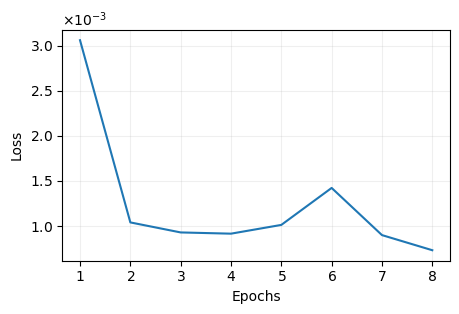

<Figure size 640x480 with 0 Axes>

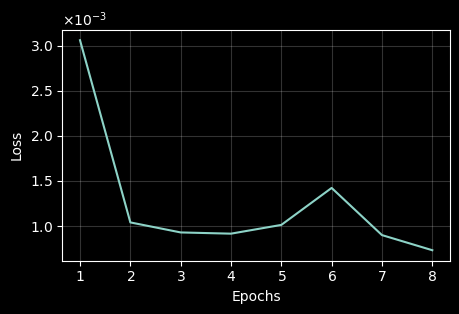

In [9]:
plot_loss_function(history, save='yes')

In [10]:
# Testing the model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 43ms/step - loss: 7.3377e-04 - mse: 1.2831e-05


[0.0007337663555517793, 1.2830792911699973e-05]

In [11]:
# model.save('model_nn')

In [12]:
y_test_0 = model.predict(X_test[100])

In [13]:
pd.DataFrame(y_test[100])

,0,1,2,3
0,0.007062,0.000000,0.000000,0.000000e+00
1,0.009438,0.000000,0.000000,-9.263917e-02
2,0.009438,-0.044697,0.422449,-9.263917e-02
3,0.009428,-0.044742,0.422360,-9.223412e-02
4,0.009419,-0.044407,0.374520,-9.182106e-02
...,...,...,...,...
19996,0.007063,-0.000066,0.000016,-3.129912e-07
19997,0.007063,-0.000066,0.000016,-3.125543e-07
19998,0.007063,-0.000066,0.000016,-3.121162e-07
19999,0.007063,-0.000066,0.000016,-3.116768e-07


In [14]:
pd.DataFrame(y_test_0)

,0,1,2,3
0,0.010865,-0.045620,-0.000703,-0.055338
1,0.010865,-0.045620,-0.000703,-0.055338
2,0.010851,-0.045871,-0.000860,-0.055353
3,0.010328,-0.044412,-0.001588,-0.059526
4,0.010125,-0.042954,-0.002332,-0.063727
...,...,...,...,...
19996,0.007456,0.000593,-0.000903,-0.000395
19997,0.007456,0.000594,-0.000903,-0.000395
19998,0.007456,0.000594,-0.000903,-0.000395
19999,0.007456,0.000594,-0.000903,-0.000395


<Figure size 640x480 with 0 Axes>

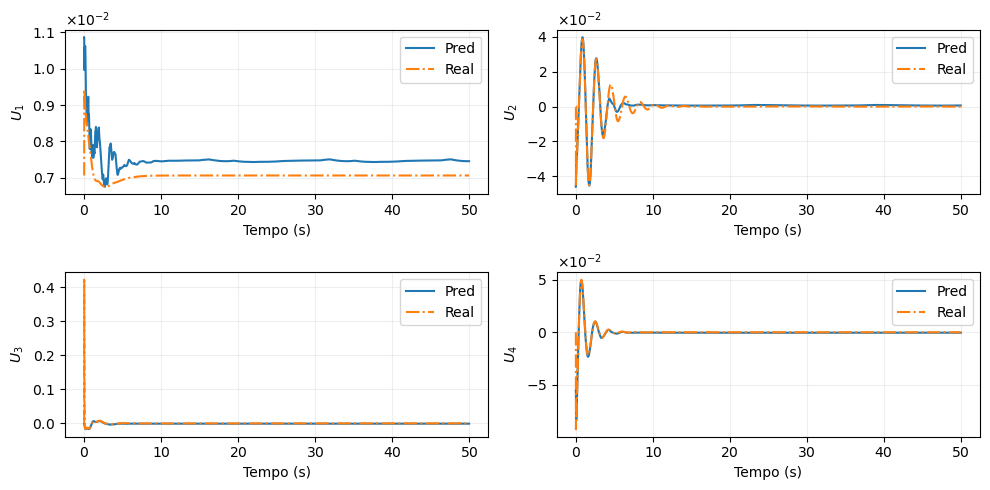

<Figure size 640x480 with 0 Axes>

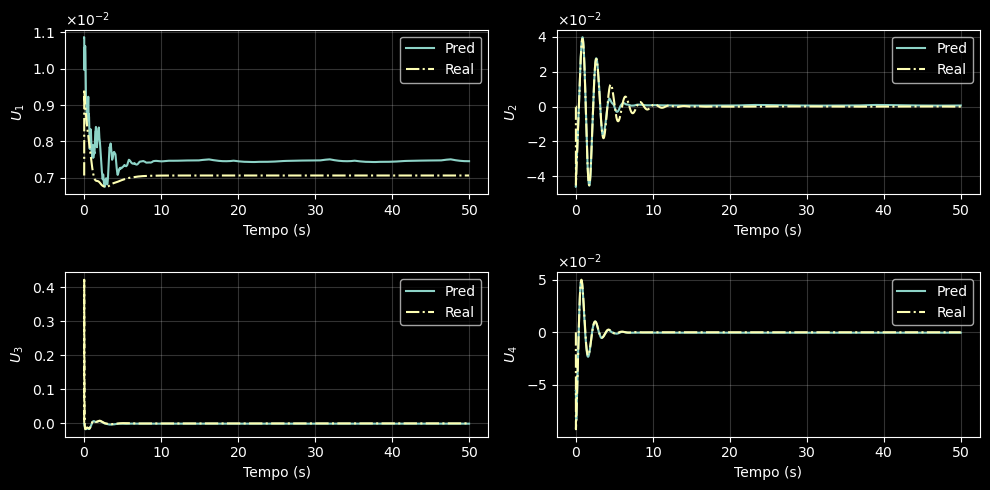

<Figure size 640x480 with 0 Axes>

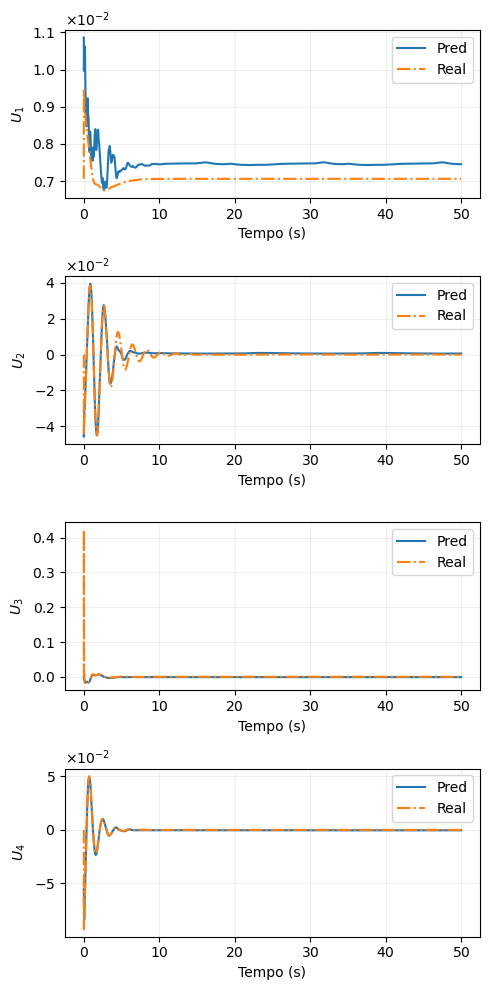

<Figure size 640x480 with 0 Axes>

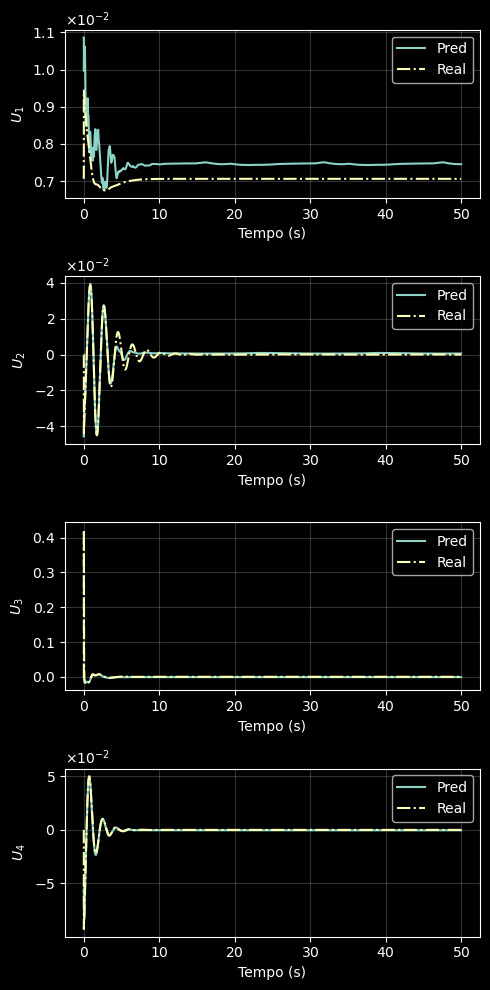

<Figure size 640x480 with 0 Axes>

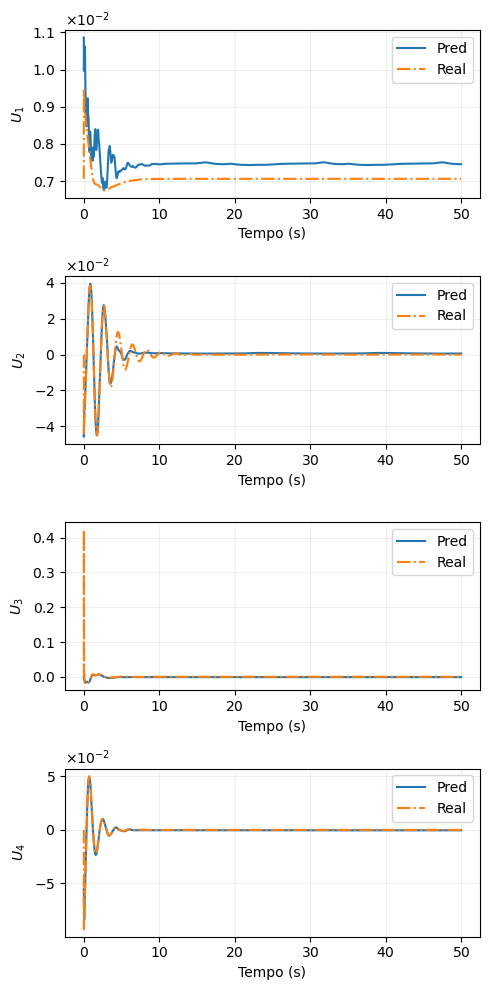

<Figure size 640x480 with 0 Axes>

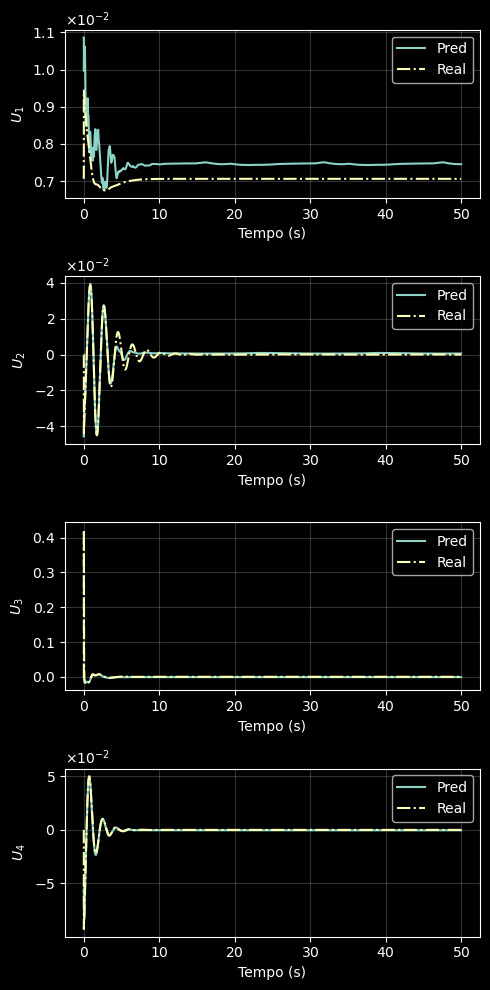

In [18]:
themes = ['default', 'dark_background']
modes = ['beamer', 'normal']

for mode in modes:

    if mode == 'beamer':

        for theme in themes:
            plt.cla()
            plt.clf()
            plt.style.use(theme)
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,5))
            axes = [ax1, ax2, ax3, ax4]

            t = np.linspace(0,50,20001)
            
            for i, ax in enumerate(axes):
                ax.set_xlabel('Tempo (s)')
                ax.set_ylabel(f'$U_{i+1}$')
                ax.plot(t, y_test_0[:,i], label='Pred')
                ax.plot(t, y_test[100][:,i], label='Real', ls='-.')
                ax.legend(loc='best')
                ax.grid(alpha=0.2)
                ax.ticklabel_format(style='sci',
                                    scilimits=(-2,2),
                                    useMathText=True)
                
            fig.tight_layout()
            fig.savefig(f'../../presentations/cic2023/figures/comparison_{theme}_{mode}.pgf', backend='pgf')
            plt.show()
    
    if mode == 'normal':
            
        for theme in themes:

            for theme in themes:
                plt.cla()
                plt.clf()
                plt.style.use(theme)
                fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4,1, figsize=(5,10))
                axes = [ax1, ax2, ax3, ax4]

                t = np.linspace(0,50,20001)
                
                for i, ax in enumerate(axes):
                    ax.set_xlabel('Tempo (s)')
                    ax.set_ylabel(f'$U_{i+1}$')
                    ax.plot(t, y_test_0[:,i], label='Pred')
                    ax.plot(t, y_test[100][:,i], label='Real', ls='-.')
                    ax.legend(loc='best')
                    ax.grid(alpha=0.2)
                    ax.ticklabel_format(style='sci',
                                        scilimits=(-2,2),
                                        useMathText=True)
                    
                fig.tight_layout()
                fig.savefig(f'../../presentations/cic2023/figures/comparison_{theme}_{mode}.pgf', backend='pgf')
                plt.show()
    